In [9]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
im = imageio.imread("utils/faces/s3/3.pgm")
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


In [4]:
print("Max original", end = " ")
print(np.amax(im))
print("Min original", end = " ")
print(np.amin(im))

Max original 204
Min original 10


In [5]:
im_original = im
im = im / 255 # 255 is the max value the image can have

print("Max original", end = " ")
print(np.amax(im))
print("Min original", end = " ")
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


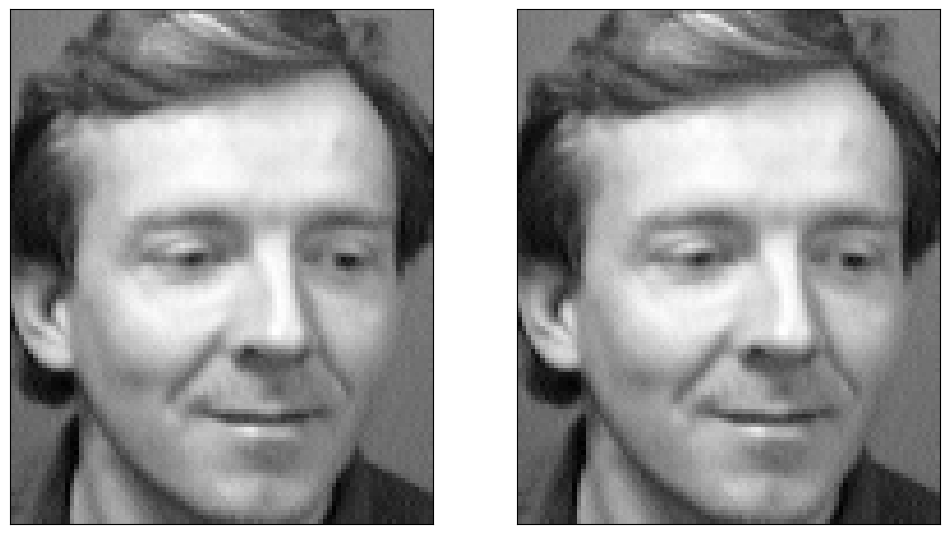

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12,12), subplot_kw = { "xticks": [], "yticks": []})

ax[0].imshow(im_original, cmap="gray")
ax[1].imshow(im, cmap="gray")

In [7]:
from glob import iglob

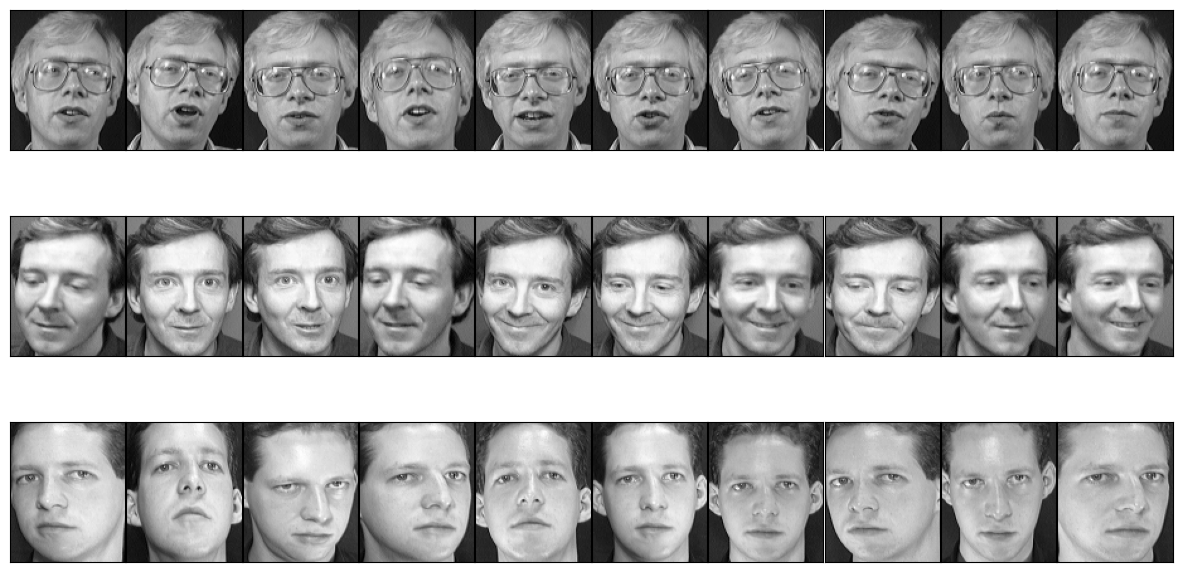

In [8]:
faces = []

for path in iglob("./utils/faces/*/*.pgm"):
    im = imageio.imread(path)
    face = pd.Series(im.flatten(), name=path)
    faces.append(face)  

faces = pd.concat(faces, axis=1).T

fig, axes = plt.subplots(3, 10, figsize=(15,8), subplot_kw = { "xticks": [], "yticks": []}, gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(faces.iloc[i].values.reshape(112,92), cmap="gray")

In [21]:
faces_pca = PCA(n_components=0.8) #n_components is the variance I can keep
faces_pca.fit(faces)

PCA(n_components=0.8)

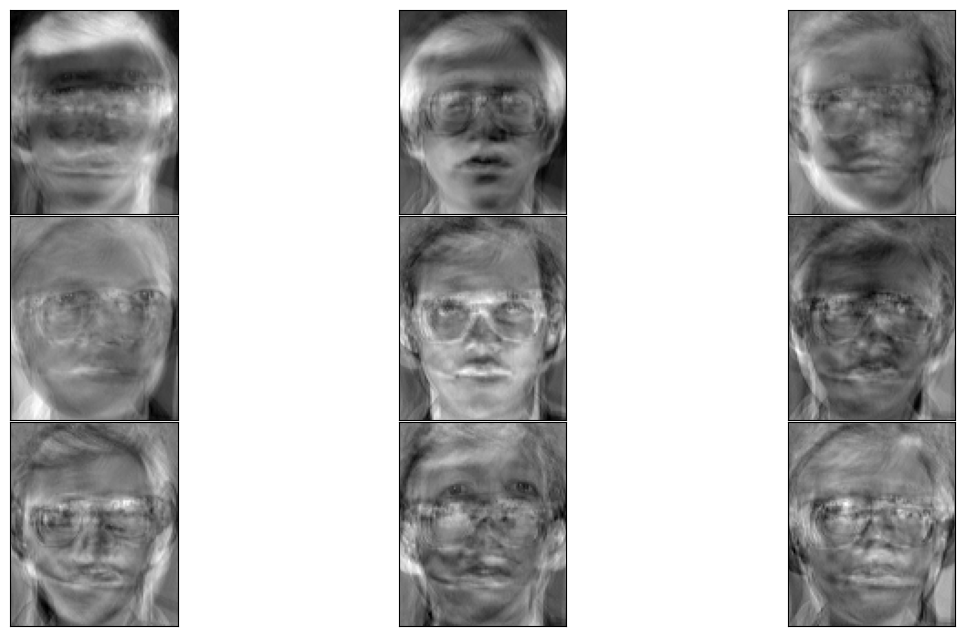

In [25]:
rows = 3
columns = faces_pca.n_components_ // rows

fig, axes = plt.subplots(rows, columns, figsize=(15,8), subplot_kw = { "xticks": [], "yticks": []}, gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(112,92), cmap="gray")

In [24]:
print(faces_pca.n_components_)

10


In [23]:
components = faces_pca.transform(faces)
projection = faces_pca.inverse_transform(components)

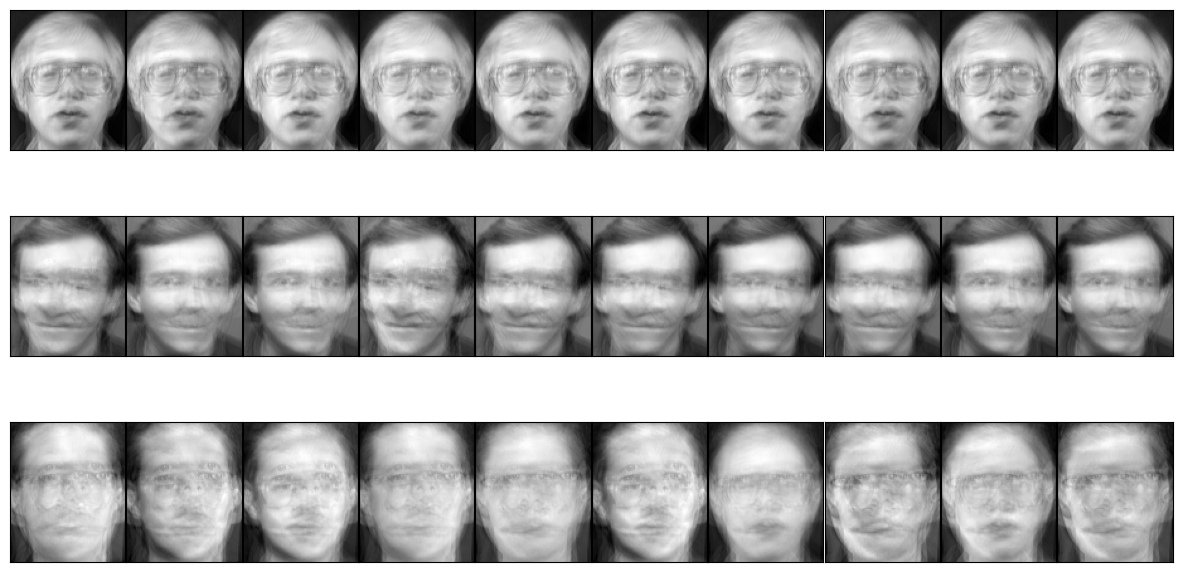

In [22]:
fig, axes = plt.subplots(3, 10, figsize=(15,8), subplot_kw = { "xticks": [], "yticks": []}, gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(projection[i].reshape(112,92), cmap="gray")